In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import mode
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/kaggle/input/datasett/Ogrenci Basar Tahmini ve Ogrenme Stili Analizi (Yantlar) - Form Yantlar 1 (1).csv')

In [3]:
df.head()

,Zaman damgası,Yaşınız,Bölümüz,Not Ortalamanız,"Bilgiye dayalı dikkatli bir analiz yoluyla alınan kararların, sezgiye dayalı kararlardan daha iyi olduğunu düşünürüm.",Yeni ve farklı bir şeyi ele alma konusunda meydan okumadan zevk alırım.,Tutarlı ve düzenli bir yaklaşım benimsemeyi ve işleri mantıklı bir biçimde düzenlemeyi severim.,Kendi başarımı arttırmak için genellikle kendi deneyimlerimi arttırmaya ve uygulama yapmaya çalışırım.,"Tartışmalarda, genellikle spontan fikirler üretirim.",Aşağıdaki çalışma stillerinden hangisi en çok size uyuyor?,Ders çalışırken genellikle nasıl bir yöntem tercih edersiniz?,Derslerinizi planlarken nasıl bir strateji izlersiniz?,Grup çalışmalarında genellikle hangi rolü üstlenirsiniz?,Ders çalışırken genellikle nerede bulunmayı tercih edersiniz?,Ders çalışırken genellikle hangi zamanda daha verimli olursunuz?,Derslerinize ne kadar vakit ayırıyorsunuz?
0,30.05.2023 09:04:11,23-24,Elektronik ve Haberleşme Mühendisliği,3.00 - 3.50,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Assimilator: Geniş bir bilgi yelpazesini anlam...,Konu anlatım videoları izlemek,Esnek bir çalışma planı benimserim,İdeaları sunan kişi,Kendi odamda,Gece yarıları,Haftada birkaç gün çalışıyorum
1,30.05.2023 09:04:45,23-24,Bilgisayar Mühendisliği,3.00 - 3.50,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Diverger: Farklı durumları birçok açıdan göreb...,Konu anlatım videoları izlemek,Konuları önem sırasına göre çalışırım,Grup lideri,Kendi odamda,Sabahları,Haftada birkaç gün çalışıyorum
2,30.05.2023 09:04:58,23-24,Bilgisayar Mühendisliği,3.50 - 4.00,Katılıyorum,Katılıyorum,Katılıyorum,Katılmıyorum,Katılıyorum,Diverger: Farklı durumları birçok açıdan göreb...,Notları tekrar okumak,Her ders için belirli saatler ayırırım,Grup lideri,Kendi odamda,Öğleden sonraları,Haftada birkaç gün çalışıyorum
3,30.05.2023 09:05:30,23-24,Elektronik ve Haberleşme Mühendisliği,3.50 - 4.00,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Converger: Teknik işlerde başarılı olan ve sor...,Konuyu kendime anlatmak,Esnek bir çalışma planı benimserim,Grup lideri,Kendi odamda,Akşamları,Sadece sınav öncesinde çalışıyorum
4,30.05.2023 09:05:51,21-22,Elektronik ve Haberleşme Mühendisliği,2.50 - 3.00,Katılmıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Diverger: Farklı durumları birçok açıdan göreb...,Notları tekrar okumak,Her ders için belirli saatler ayırırım,Grup lideri,Kendi odamda,Gece yarıları,Sadece sınav öncesinde çalışıyorum


In [4]:
df = df.rename(columns={'Zaman damgası': 'Zaman',
                        'Yaşınız': 'Yas',
                        'Bölümüz': 'Bolum', 
                        'Not Ortalamanız': 'Not_Ortalamasi', 
                        'Bilgiye dayalı dikkatli bir analiz yoluyla alınan kararların, sezgiye dayalı kararlardan daha iyi olduğunu düşünürüm.': 'Bilgi_Sezi_Analiz',
                        'Yeni ve farklı bir şeyi ele alma konusunda meydan okumadan zevk alırım.': 'Yeni_Farkli',
                        'Tutarlı ve düzenli bir yaklaşım benimsemeyi ve işleri mantıklı bir biçimde düzenlemeyi severim.': 'Tutarli_Duzenli',
                        'Kendi başarımı arttırmak için genellikle kendi deneyimlerimi arttırmaya ve uygulama yapmaya çalışırım.': 'Basari_Deneyim',
                        'Tartışmalarda, genellikle spontan fikirler üretirim.': 'Spontan_Fikir',
                        'Aşağıdaki çalışma stillerinden hangisi en çok size uyuyor?': 'Calisma_Stili',
                        'Ders çalışırken genellikle nasıl bir yöntem tercih edersiniz?': 'Ders_Yontemi',
                        'Derslerinizi planlarken nasıl bir strateji izlersiniz?': 'Ders_Stratejisi',
                        'Grup çalışmalarında genellikle hangi rolü üstlenirsiniz?': 'Grup_Rolu',
                        'Ders çalışırken genellikle nerede bulunmayı tercih edersiniz?': 'Ders_Yeri',
                        'Ders çalışırken genellikle hangi zamanda daha verimli olursunuz?': 'Ders_Zamani',
                        'Derslerinize ne kadar vakit ayırıyorsunuz?': 'Ders_Suresi'})


In [5]:
df = df.drop('Zaman', axis=1)

In [6]:
# ankette yaş aralık ve string olarak alınmıştı o değerler sayısallaştırıldı
def process_age_range(age_range):
    if age_range == "26+":
        return 26  
    age_range_split = age_range.split("-")
    lower_bound = int(age_range_split[0])
    upper_bound = int(age_range_split[1])
    return random.choice([lower_bound, upper_bound])
df["Yas"] = df["Yas"].apply(process_age_range)

In [7]:
# null değer içeren satırlar silindi
df = df.dropna()

In [8]:
df.head()

,Yas,Bolum,Not_Ortalamasi,Bilgi_Sezi_Analiz,Yeni_Farkli,Tutarli_Duzenli,Basari_Deneyim,Spontan_Fikir,Calisma_Stili,Ders_Yontemi,Ders_Stratejisi,Grup_Rolu,Ders_Yeri,Ders_Zamani,Ders_Suresi
0,24,Elektronik ve Haberleşme Mühendisliği,3.00 - 3.50,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Assimilator: Geniş bir bilgi yelpazesini anlam...,Konu anlatım videoları izlemek,Esnek bir çalışma planı benimserim,İdeaları sunan kişi,Kendi odamda,Gece yarıları,Haftada birkaç gün çalışıyorum
1,23,Bilgisayar Mühendisliği,3.00 - 3.50,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Diverger: Farklı durumları birçok açıdan göreb...,Konu anlatım videoları izlemek,Konuları önem sırasına göre çalışırım,Grup lideri,Kendi odamda,Sabahları,Haftada birkaç gün çalışıyorum
2,24,Bilgisayar Mühendisliği,3.50 - 4.00,Katılıyorum,Katılıyorum,Katılıyorum,Katılmıyorum,Katılıyorum,Diverger: Farklı durumları birçok açıdan göreb...,Notları tekrar okumak,Her ders için belirli saatler ayırırım,Grup lideri,Kendi odamda,Öğleden sonraları,Haftada birkaç gün çalışıyorum
3,24,Elektronik ve Haberleşme Mühendisliği,3.50 - 4.00,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Converger: Teknik işlerde başarılı olan ve sor...,Konuyu kendime anlatmak,Esnek bir çalışma planı benimserim,Grup lideri,Kendi odamda,Akşamları,Sadece sınav öncesinde çalışıyorum
4,22,Elektronik ve Haberleşme Mühendisliği,2.50 - 3.00,Katılmıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Katılıyorum,Diverger: Farklı durumları birçok açıdan göreb...,Notları tekrar okumak,Her ders için belirli saatler ayırırım,Grup lideri,Kendi odamda,Gece yarıları,Sadece sınav öncesinde çalışıyorum


In [9]:
df.info

<bound method DataFrame.info of     Yas                                  Bolum Not_Ortalamasi  \
0    24  Elektronik ve Haberleşme Mühendisliği    3.00 - 3.50   
1    23                Bilgisayar Mühendisliği    3.00 - 3.50   
2    24                Bilgisayar Mühendisliği    3.50 - 4.00   
3    24  Elektronik ve Haberleşme Mühendisliği    3.50 - 4.00   
4    22  Elektronik ve Haberleşme Mühendisliği    2.50 - 3.00   
..  ...                                    ...            ...   
91   23                                İşletme    2.00 - 2.50   
92   22              Italyan Dili ve Edebiyati    2.50 - 3.00   
93   23      Kontrol ve Otomasyon Mühendisliği    2.50 - 3.00   
94   24                              Sosyoloji    3.00 - 3.50   
95   23                Mekatronik Mühendisliği    3.00 - 3.50   

   Bilgi_Sezi_Analiz   Yeni_Farkli Tutarli_Duzenli Basari_Deneyim  \
0        Katılıyorum   Katılıyorum     Katılıyorum    Katılıyorum   
1        Katılıyorum   Katılıyorum     Katılıyoru

In [10]:
df.columns

Index(['Yas', 'Bolum', 'Not_Ortalamasi', 'Bilgi_Sezi_Analiz', 'Yeni_Farkli',
       'Tutarli_Duzenli', 'Basari_Deneyim', 'Spontan_Fikir', 'Calisma_Stili',
       'Ders_Yontemi', 'Ders_Stratejisi', 'Grup_Rolu', 'Ders_Yeri',
       'Ders_Zamani', 'Ders_Suresi'],
      dtype='object')

In [11]:
# 'one hot encoding işlemi
bolum_dummies = pd.get_dummies(df['Bolum'], prefix='Bolum')
df = pd.concat([df, bolum_dummies], axis=1)
df = df.drop('Bolum', axis=1) 

In [12]:
# kategorik özellikler sayısallaştırıldı
categorical_features = ["Bilgi_Sezi_Analiz", "Yeni_Farkli", "Tutarli_Duzenli", "Basari_Deneyim", "Spontan_Fikir", 
                        "Calisma_Stili", "Ders_Yontemi", "Ders_Stratejisi", "Grup_Rolu", "Ders_Yeri", "Ders_Zamani", "Ders_Suresi"]

for feature in categorical_features:
    unique_values = df[feature].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    df[feature] = df[feature].map(mapping)

In [13]:
# not ortalaması aralığını orta değeri ile değiştirme
df["Not_Ortalamasi"] = df["Not_Ortalamasi"].map({"2.00 - 2.50": 2.25, 
                                                 "2.50 - 3.00": 2.75,
                                                 "3.00 - 3.50": 3.25,
                                                 "3.50 - 4.00": 3.75})

In [14]:
df.head(35)

,Yas,Not_Ortalamasi,Bilgi_Sezi_Analiz,Yeni_Farkli,Tutarli_Duzenli,Basari_Deneyim,Spontan_Fikir,Calisma_Stili,Ders_Yontemi,Ders_Stratejisi,...,Bolum_Psikoloji,Bolum_Sosyoloji,Bolum_Uluslararasi Ticaret,Bolum_Uçak Teknolojisi,Bolum_Yönetim Bilişim Sistemleri,Bolum_kontrol ve otomasyon mühendisliği,Bolum_İktisat,Bolum_İlahiyat,Bolum_İnşaat Mühendisliği,Bolum_İşletme
0,24,3.25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,23,3.25,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,24,3.75,0,0,0,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
3,24,3.75,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,22,2.75,1,0,0,0,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
5,24,2.75,0,0,0,0,1,2,3,0,...,0,0,0,0,0,0,0,0,0,0
6,24,3.25,1,1,1,0,0,3,2,0,...,0,0,0,0,0,0,0,0,0,0
7,22,2.75,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,24,2.75,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
9,24,2.75,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Veri Görselleştirme

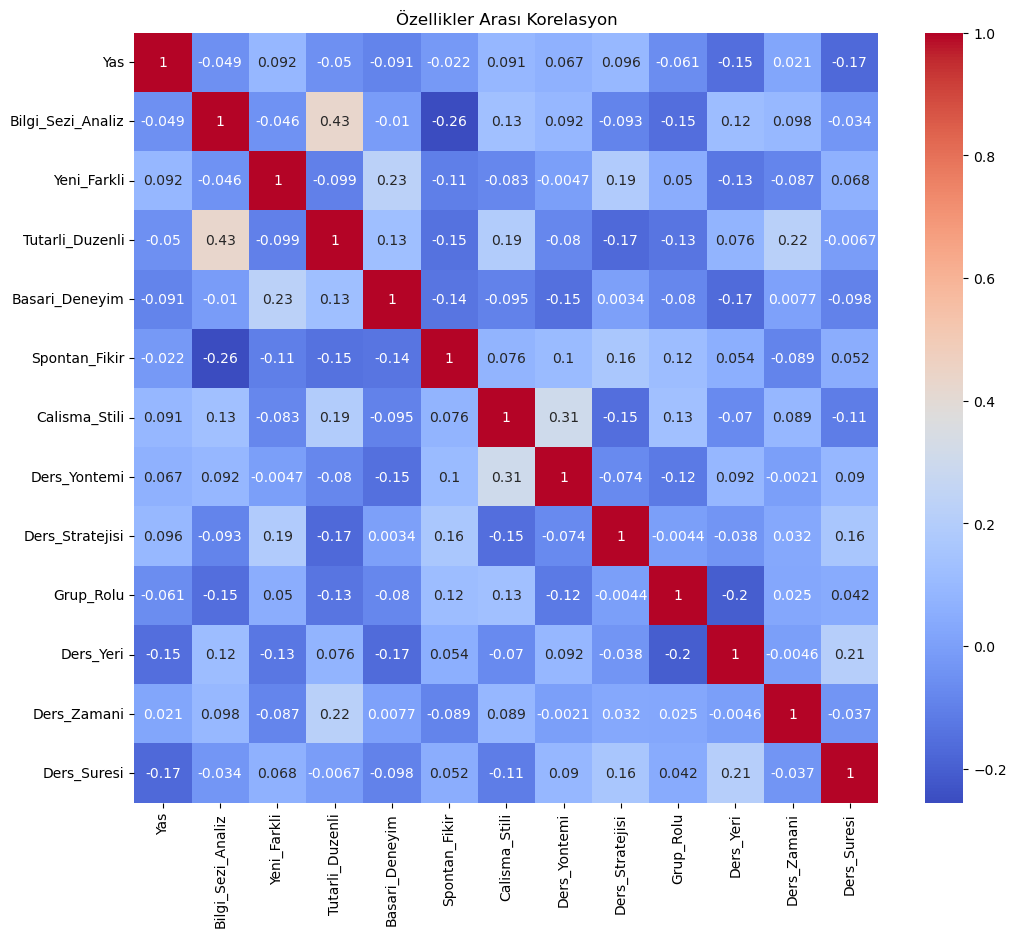

In [15]:
filtered_df = df[["Yas", "Bilgi_Sezi_Analiz", "Yeni_Farkli", "Tutarli_Duzenli", "Basari_Deneyim", "Spontan_Fikir",
                  "Calisma_Stili", "Ders_Yontemi", "Ders_Stratejisi", "Grup_Rolu", "Ders_Yeri", "Ders_Zamani",
                  "Ders_Suresi"]]

# ısı haritasını çizme
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_df.corr(), annot=True, cmap='coolwarm')
plt.title('Özellikler Arası Korelasyon')
plt.show()


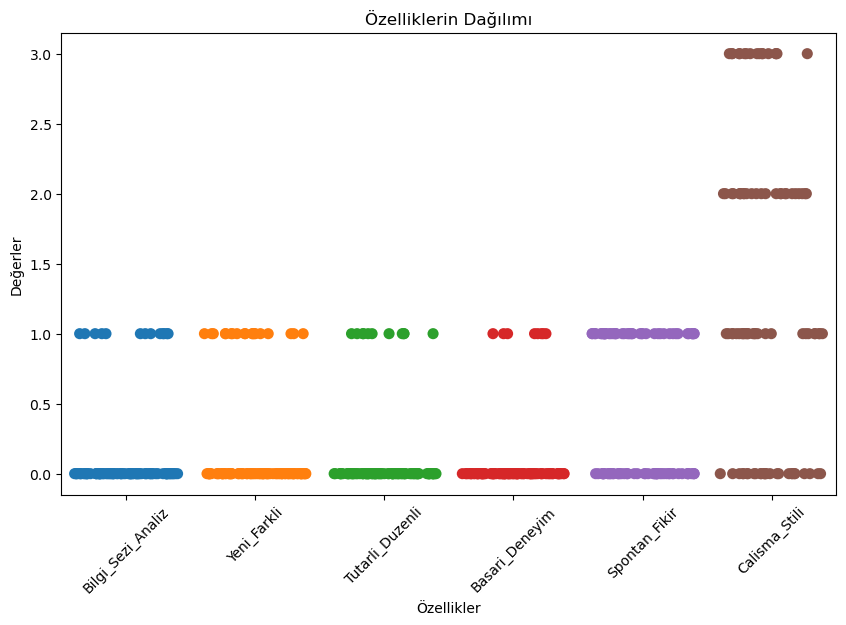

In [16]:
# çalışma stiline etki eden özelliklerin dağılımı
fig, ax = plt.subplots(figsize=(10, 6))
sns.stripplot(data=df[['Bilgi_Sezi_Analiz', 'Yeni_Farkli', 'Tutarli_Duzenli', 'Basari_Deneyim', 'Spontan_Fikir', 'Calisma_Stili']], jitter=0.4, size=8)
ax.set_xlabel('Özellikler')
ax.set_ylabel('Değerler')
ax.set_title('Özelliklerin Dağılımı')
plt.xticks(rotation=45)
plt.show()

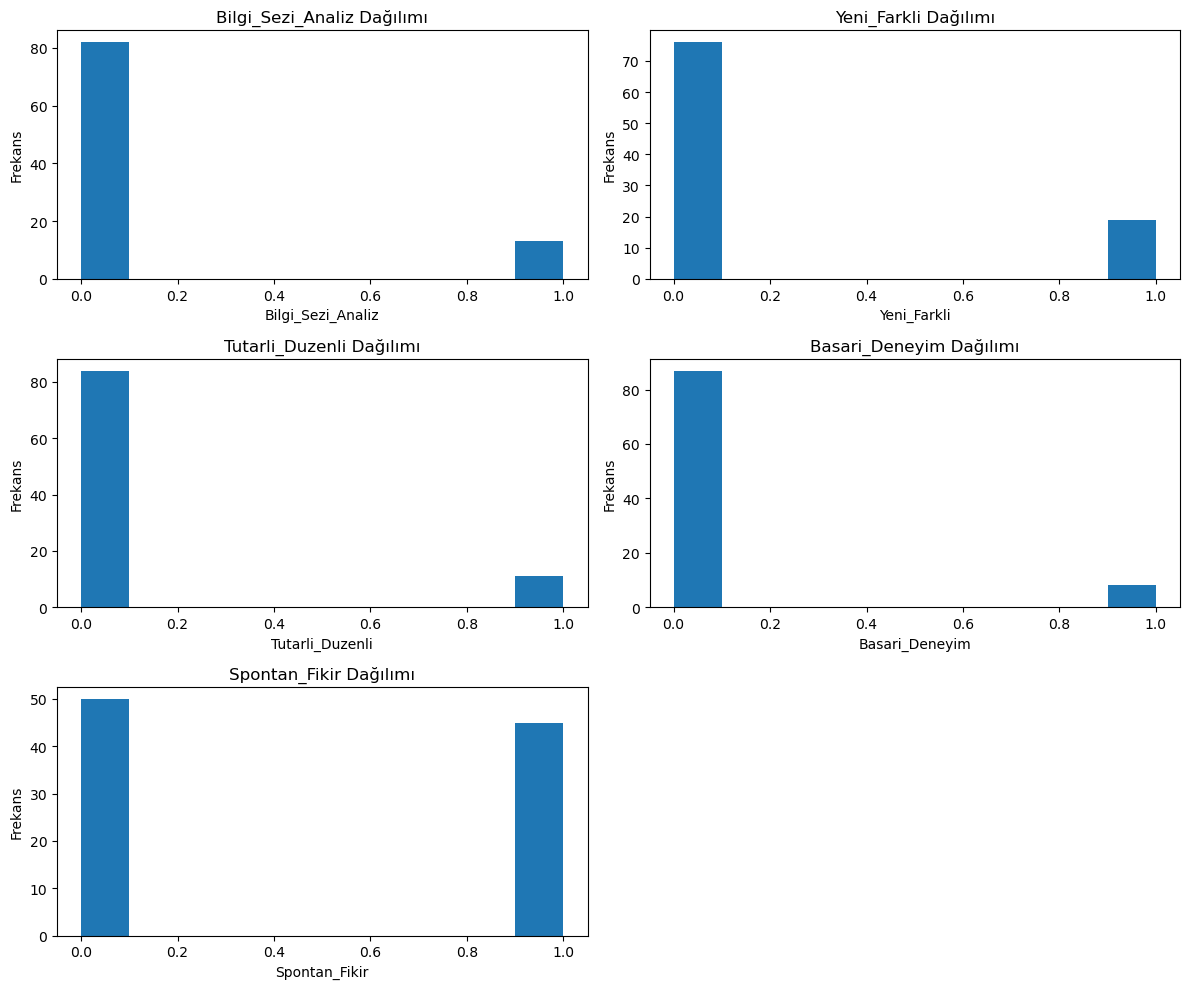

In [17]:
# çalışma tarzı dağılımı
columns = ['Bilgi_Sezi_Analiz', 'Yeni_Farkli', 'Tutarli_Duzenli', 'Basari_Deneyim', 'Spontan_Fikir']
plt.figure(figsize=(12, 10))
for i, column in enumerate(columns):
    plt.subplot(3, 2, i+1)
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel('Frekans')
    plt.title(f'{column} Dağılımı')
plt.tight_layout()
plt.show()

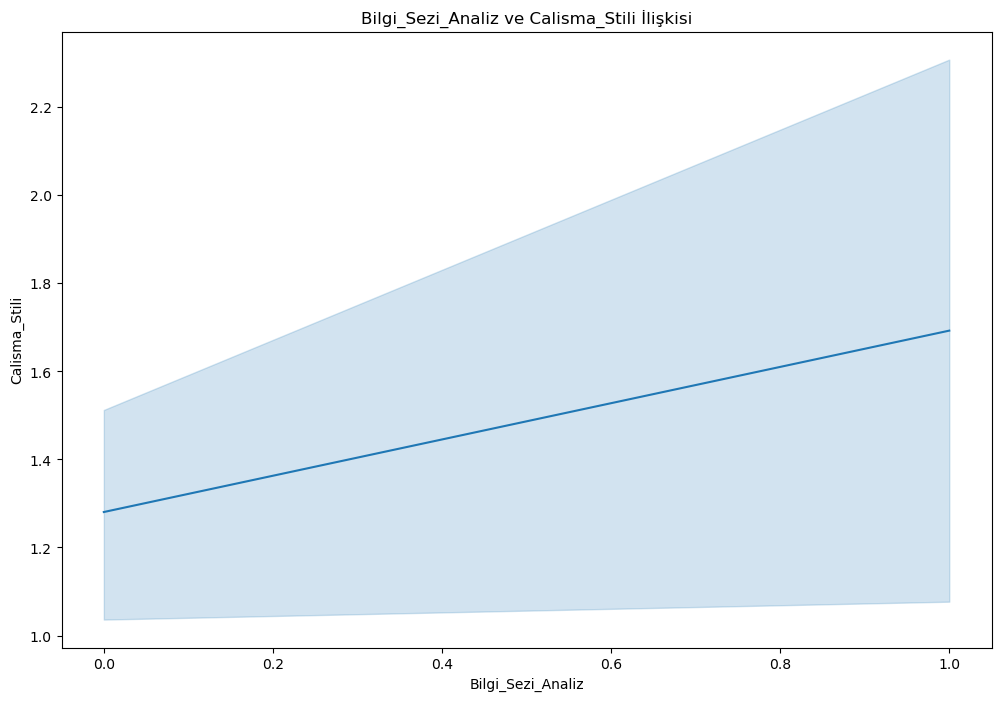

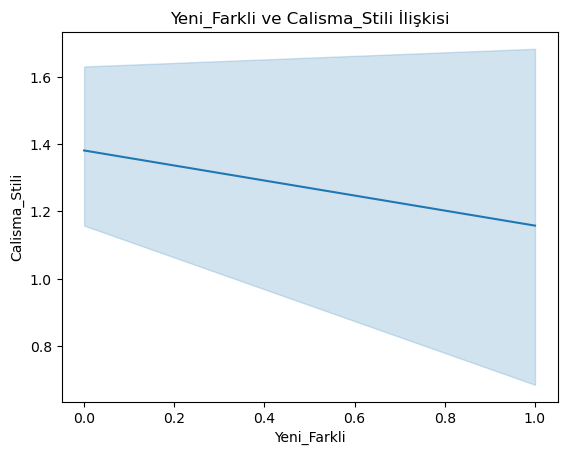

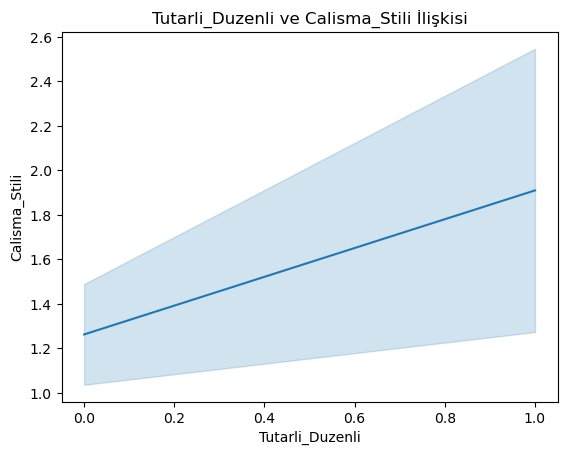

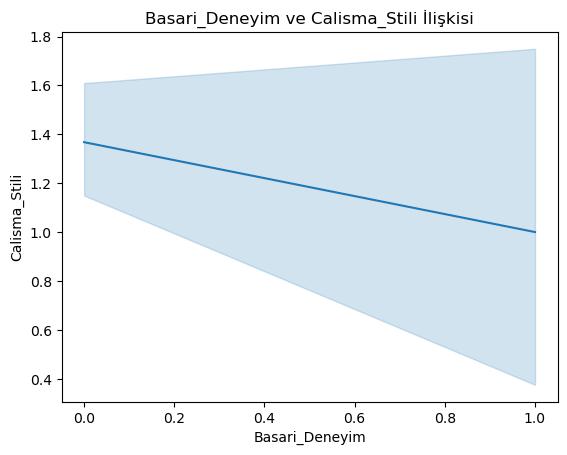

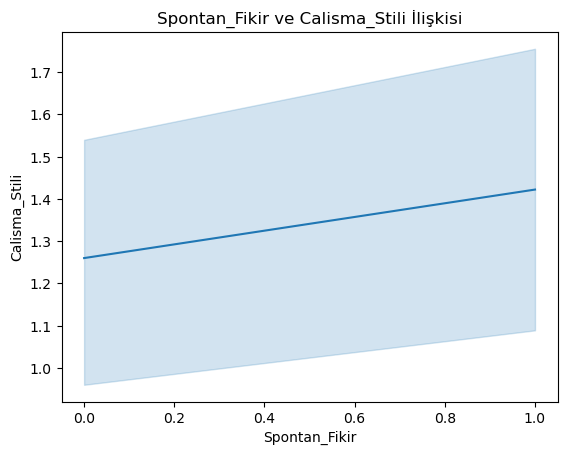

In [18]:
# özelliklerin çalışma stili ile ilişkisi
features = ['Bilgi_Sezi_Analiz', 'Yeni_Farkli', 'Tutarli_Duzenli', 'Basari_Deneyim', 'Spontan_Fikir']
plt.figure(figsize=(12, 8))
for feature in features:
    sns.lineplot(data=df, x=feature, y='Calisma_Stili')
    plt.xlabel(feature)
    plt.ylabel('Calisma_Stili')
    plt.title(f"{feature} ve Calisma_Stili İlişkisi")
    plt.show()

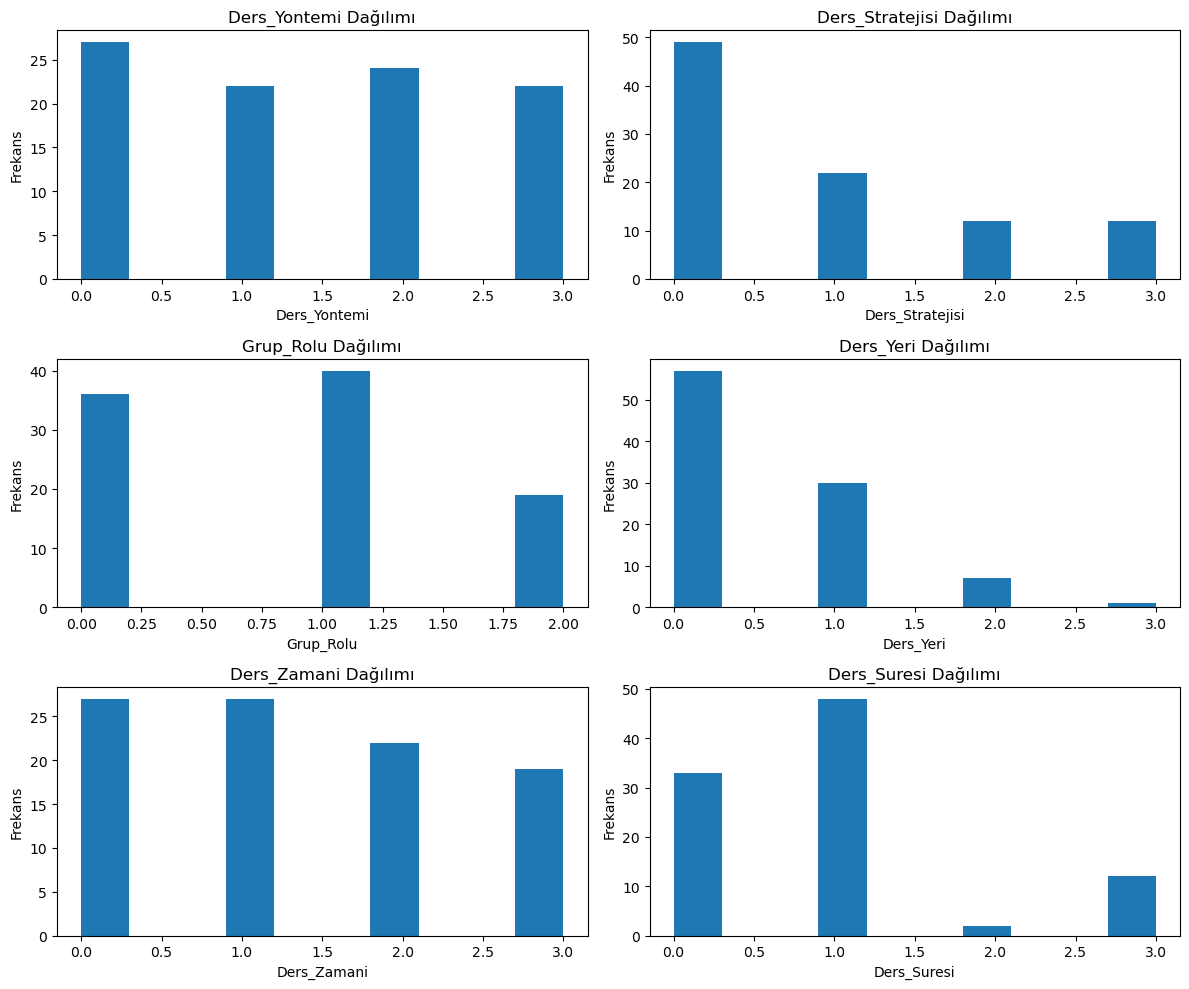

In [19]:
# ders çalışma stillerinin dağılımı
columns = ['Ders_Yontemi', 'Ders_Stratejisi', 'Grup_Rolu', 'Ders_Yeri', 'Ders_Zamani', 'Ders_Suresi']
plt.figure(figsize=(12, 10))

for i, column in enumerate(columns):
    plt.subplot(3, 2, i+1)
    plt.hist(df[column])
    plt.xlabel(column)
    plt.ylabel('Frekans')
    plt.title(f'{column} Dağılımı')
plt.tight_layout()
plt.show()


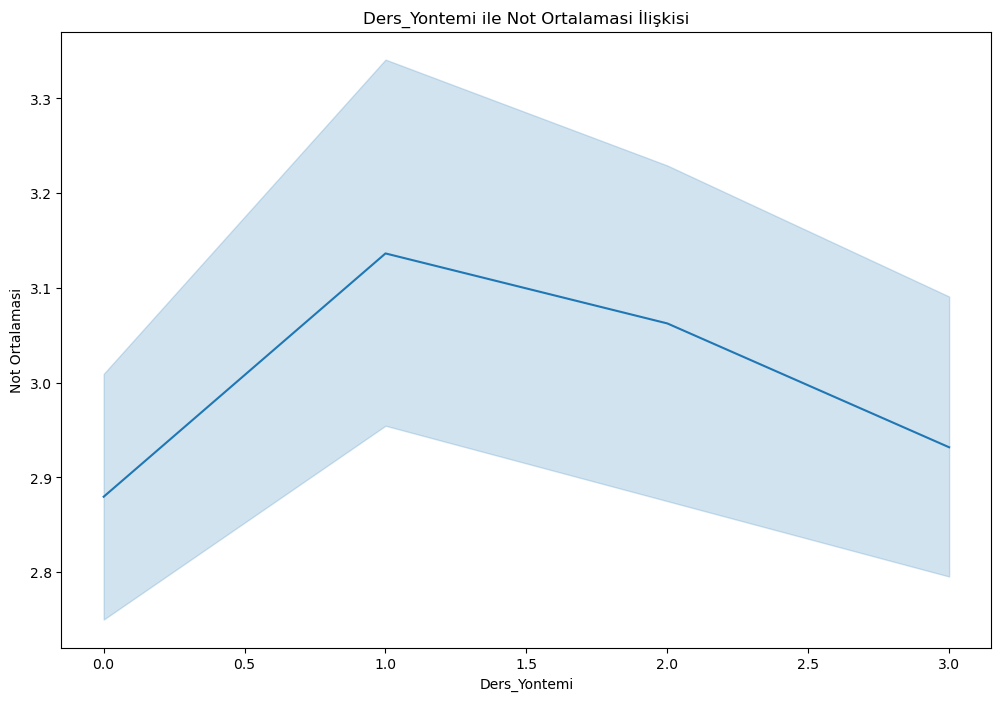

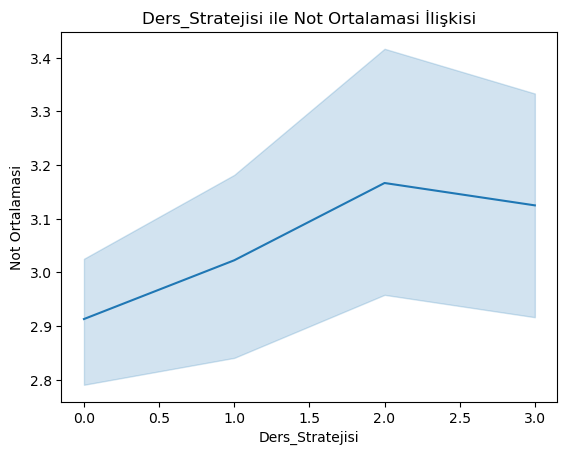

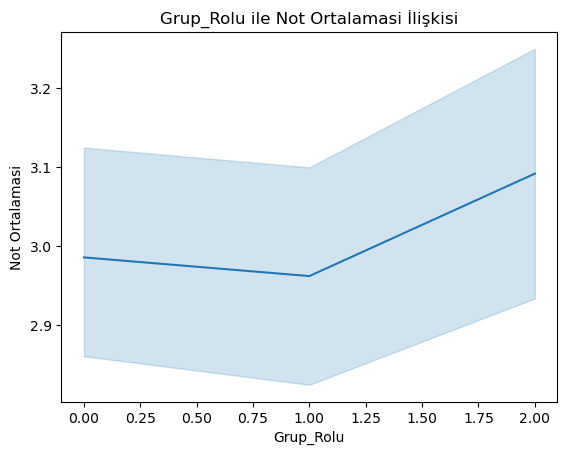

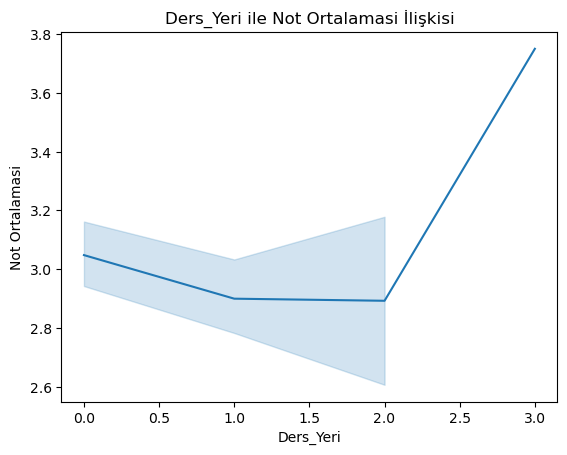

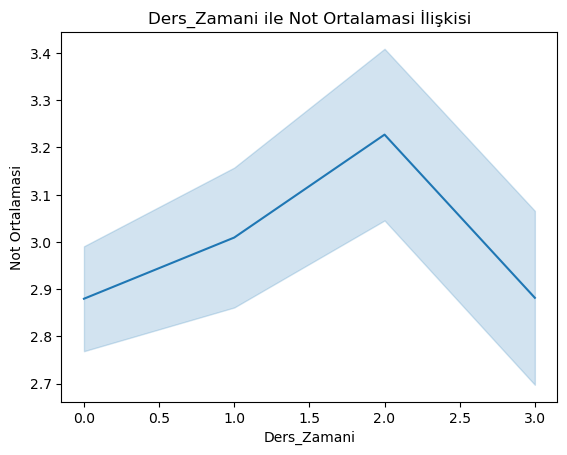

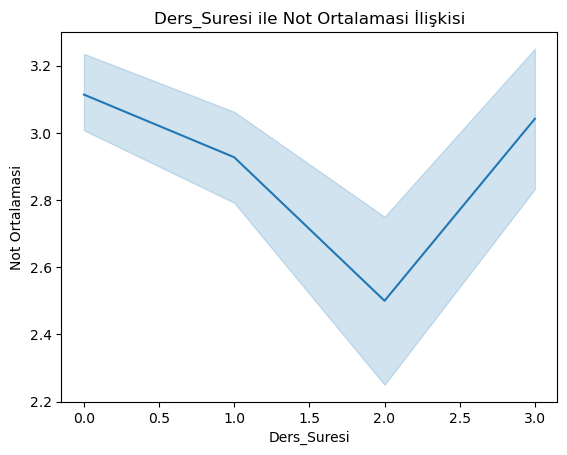

In [20]:
#ders çalışma stillerinin not ortalamasına etkisi
columns = ['Ders_Yontemi', 'Ders_Stratejisi', 'Grup_Rolu', 'Ders_Yeri', 'Ders_Zamani', 'Ders_Suresi']
plt.figure(figsize=(12, 8))

for column in columns:
    sns.lineplot(data=df, x=column, y='Not_Ortalamasi')
    plt.xlabel(column)
    plt.ylabel('Not Ortalamasi')
    plt.title(f'{column} ile Not Ortalamasi İlişkisi')
    plt.show()


# Tahminleme

In [21]:
X = df.drop('Not_Ortalamasi', axis=1)
y = df['Not_Ortalamasi']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.head())

    Yas  Bilgi_Sezi_Analiz  Yeni_Farkli  Tutarli_Duzenli  Basari_Deneyim  \
67   26                  0            1                0               1   
15   22                  0            0                0               0   
79   26                  0            0                0               0   
80   22                  1            0                1               0   
30   21                  0            0                0               0   

    Spontan_Fikir  Calisma_Stili  Ders_Yontemi  Ders_Stratejisi  Grup_Rolu  \
67              1              1             2                2          0   
15              0              0             0                0          0   
79              0              2             2                0          1   
80              0              3             1                0          2   
30              1              3             2                0          0   

    ...  Bolum_Psikoloji  Bolum_Sosyoloji  Bolum_Uluslararasi Ticaret  \
6

In [24]:
print(X_train.columns)

Index(['Yas', 'Bilgi_Sezi_Analiz', 'Yeni_Farkli', 'Tutarli_Duzenli',
       'Basari_Deneyim', 'Spontan_Fikir', 'Calisma_Stili', 'Ders_Yontemi',
       'Ders_Stratejisi', 'Grup_Rolu', 'Ders_Yeri', 'Ders_Zamani',
       'Ders_Suresi', 'Bolum_Bilgisayar Mühendisliği', 'Bolum_Biyomühendislik',
       'Bolum_Coğrafya', 'Bolum_Dilbilim', 'Bolum_Ekonomi',
       'Bolum_Elektrik Mühendisliği',
       'Bolum_Elektronik ve Haberleşme Mühendisliği',
       'Bolum_Elektronik ve Haberleşme Mühendisliği ',
       'Bolum_Endüstri Mühendisiliği', 'Bolum_Endüstri Mühendisliği',
       'Bolum_Harita Mühendisliği', 'Bolum_Italyan Dili ve Edebiyati',
       'Bolum_Kimya Mühendisliği', 'Bolum_Kontrol Otomasyon Mühendisliği',
       'Bolum_Kontrol ve Otomasyon Mühendisliği',
       'Bolum_Matematik Mühendisliği', 'Bolum_Mekatronik Mühendisliği',
       'Bolum_Metalurji ve Malzeme Mühendisliği', 'Bolum_Mimarlik',
       'Bolum_Mimarlık ', 'Bolum_Pdr', 'Bolum_Psikoloji', 'Bolum_Sosyoloji',
       'Bolum_Ulusl

In [25]:
y_train.head()

67    2.75
15    2.75
79    2.75
80    3.25
30    2.25
Name: Not_Ortalamasi, dtype: float64

In [26]:
def mean_squared_error(y_true, y_pred):      # mse yi kütüphane kullanmadan hesaplamak için 
    return np.mean((np.array(y_true) - np.array(y_pred))**2)

**Linear Regression**

In [27]:
# Öncelikle, birim matris ekleyerek X matrisimizi hazırlıyoruz
X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Normal denklemi çözüyoruz
theta_best = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

# Artık theta_best parametrelerimiz (yani, özniteliklerin ağırlıkları) elimizde. 
# Bunları test setindeki özniteliklerle çarparsak, tahminlerimizi elde ederiz.
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
linear_predictions_manual = X_test_b.dot(theta_best)

In [28]:
#y_test = y_test.values.tolist()  # listeye çevirme işlemi fakat gerek kalmadı 
linear_mse = mean_squared_error(y_test, linear_predictions_manual)
print("MSE:", linear_mse)

MSE: 0.4013817854127068


**KNN**

In [29]:
# aradaki benzerliği bulmak için öklid uzaklık hesaplamayı kullandık 
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))
#her noktanın test pointe olan uzaklığını hesaplıyoruz 
def predict_regression(X_train, y_train, test_point, k):
    distances = []
    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], test_point)
        distances.append((distance, y_train[i]))
    # en yakın k noktayı alıyoruz 
    distances.sort()
    k_nearest_neighbors = np.array(distances[:k])
    
    prediction = np.mean(k_nearest_neighbors[:,1])
    return prediction

# Data daha önce ayrıldı
X_train = X_train.values.tolist()  # df leri listeye çevirme işlemi 
y_train = y_train.values.tolist()
X_test = X_test.values.tolist()
k = 5  # en yakın 5 noktayı göstersin 
knn_predictions = []
for test_point in X_test:
    prediction = predict_regression(X_train, y_train, test_point, k)
    knn_predictions.append(prediction)

print(knn_predictions)

[2.95, 2.85, 3.05, 2.95, 2.95, 2.75, 3.15, 2.85, 2.95, 2.95, 2.75, 2.85, 2.95, 2.85, 3.05, 3.05, 2.85, 2.95, 3.15]


In [30]:
knn_mse = mean_squared_error(y_test, knn_predictions)
print("MSE:", knn_mse) # hata oranı düşük çıktı demek ki modelimiz güzel çalışmıştır.

MSE: 0.2721052631578947


**Decision Tree**

In [31]:
def split_data(X, y, split_column, split_value): # decision tree yi oluşturmak için belirli bir değer üstünden veriyi ayırmaya yaraya fonksiyon. 
    l_maske = X[:, split_column] <= split_value
    r_maske = X[:, split_column] > split_value
    X_left = X[l_maske]
    y_left = y[l_maske]
    X_right = X[r_maske]
    y_right = y[r_maske]
    return X_left, y_left, X_right, y_right

def calculate_gini(y): # decision tree mizi gini metriğine göre oluşturacağımız için burada gini indexi hesaplıyoruz. 
    classes, counts = np.unique(y, return_counts=True)  # veri kümesinini homojenliğini ölçüyoruz 
    gini = 1 - np.sum((counts / len(y)) ** 2)
    return gini

def determine_best_split(X, y):
    best_gini = float('inf') # bu fonksiyon ile en başta sonsuz değer olan gini değeri her bir iterasyonda yenilenerek en küçük değere ulaşır. 
    best_column = None  # decision treedeki her bir bölme kriteri için en iyi ayrım sütunu belirlenir. 
    best_value = None
    for column_index in range(X.shape[1]):
        unique_values = np.unique(X[:, column_index])
        for value in unique_values:
            X_left, y_left, X_right, y_right = split_data(X, y, column_index, value)
            gini_left = calculate_gini(y_left)
            gini_right = calculate_gini(y_right)
            gini = (len(y_left) * gini_left + len(y_right) * gini_right) / len(y)
            if gini < best_gini:
                best_gini = gini
                best_column = column_index
                best_value = value
    return best_column, best_value     ## en iyi sütun ve değeri döndürülür.

def create_leaf(y):      ## decision tree de düğüm oluşturmak için 
    classes, counts = np.unique(y, return_counts=True)
    cogunluk = classes[np.argmax(counts)] # en yüksek örnek sayısına sahip sınıfın indeksi
    leaf = {'class': cogunluk, 'count': len(y)}
    return leaf

def build_tree(X, y, depth=10, min_samples=5): # recursive bir şekilde karar ağacını oluşturmak için 
    if depth == 0 or len(y) <= min_samples:
        return create_leaf(y)
    split_column, split_value = determine_best_split(X, y)
    if split_column is None or split_value is None:
        return create_leaf(y)
    X_left, y_left, X_right, y_right = split_data(X, y, split_column, split_value)
    depth -= 1
    sub_tree = {
        'split_column': split_column,    # her bir adımda alt ağaçlar oluşturulur, en iyi bölünme kriterleri belirlenir ve yaprak düğümler oluşturulur.
        'split_value': split_value,
        'left': build_tree(X_left, y_left, depth, min_samples),
        'right': build_tree(X_right, y_right, depth, min_samples)
    }
    return sub_tree

def predict_example(example, tree): #bu fonksiyon ile bir örnek gezilerek, örneğin hedef değişken değeini(not ortalaması) tahmin ederiz. 
    if 'class' in tree:             #recursive çalışarak dallarda bölünme kriterlerine göre ilerler 
        return tree['class']          
    split_column = tree['split_column']
    split_value = tree['split_value']
    if example[split_column] <= split_value:
        return predict_example(example, tree['left'])
    else:
        return predict_example(example, tree['right'])

def decision_tree_predictions(X_test, tree): # test verisetinde oluşturulan karar ağacını kullanarak tahminleri oluştururuz.
    predictions = []
    for example in X_test:
        prediction = predict_example(example, tree)
        predictions.append(prediction)
    return predictions

# Verileri hazırlama
X = df.drop('Not_Ortalamasi', axis=1).values
y = df['Not_Ortalamasi'].values

# Veri setini eğitim ve test olarak bölelim     # daha öncesinde yapılmıştı fakat karışıklık oluşturmasın diye tekrarlıyoruz 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Karar ağacı modelini eğitelim
tree = build_tree(X_train, y_train, depth=10, min_samples=5)

# Test veri setinde tahminler yapalım
dt_predictions = decision_tree_predictions(X_test, tree)

print(dt_predictions)


[3.25, 2.75, 3.25, 2.75, 2.75, 2.25, 3.25, 3.25, 3.25, 3.25, 2.25, 3.25, 3.25, 2.75, 2.75, 2.25, 2.75, 2.75, 3.25]


In [32]:
tree_mse = mean_squared_error(y_test, dt_predictions)
print("MSE:", tree_mse)

MSE: 0.4868421052631579


In [33]:
# oluşturduğumuz üç modele bakılırsa en az hata oranı knn algoritmasında oluşmuştur. 
#En başarılı modelimiz knn olduğu için tahminleme işleminde bunu kullanacağız. 
print("Linear Regression MSE:", linear_mse)  
print("KNN MSE:", knn_mse)
print("Decision Tree MSE:", tree_mse)

Linear Regression MSE: 0.4013817854127068
KNN MSE: 0.2721052631578947
Decision Tree MSE: 0.4868421052631579


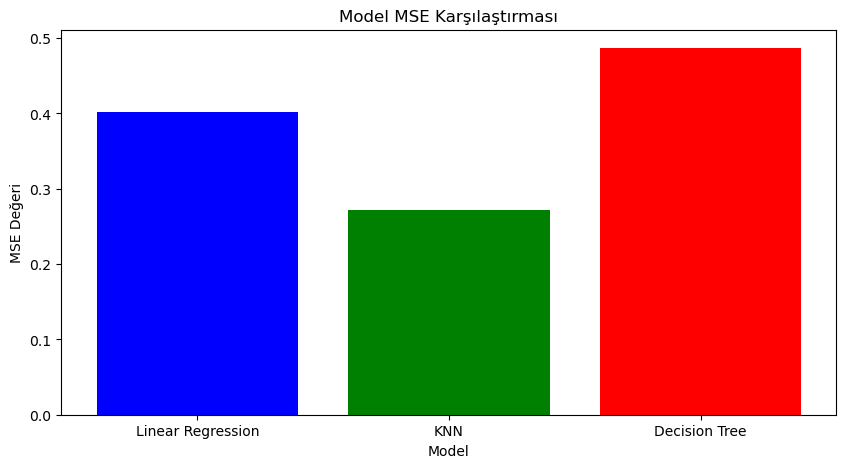

In [34]:
# modellerin görsel karşılaştırılması
model_errors = {"Linear Regression": linear_mse, 
                "KNN": knn_mse, 
                "Decision Tree": tree_mse}

plt.figure(figsize=(10, 5))
plt.bar(model_errors.keys(), model_errors.values(), color=['blue', 'green', 'red'])
plt.title("Model MSE Karşılaştırması")
plt.xlabel("Model")
plt.ylabel("MSE Değeri")
plt.show()

# Başarı Arttırma Önerileri

In [35]:
# uyumsuzluk olmaması için tekrardan atandı 
X = df.drop('Not_Ortalamasi', axis=1)
y = df['Not_Ortalamasi']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# öneri için en fazla etkisi olan featurelar çıkartıldı
feature_importances = {}
for feature in X.columns:
    if not feature.startswith('Bolum_'):
        # ortalama
        feature_mean = X[feature].mean()
        target_mean = y.mean()
        # varyans
        feature_variance = X[feature].var()
        target_variance = y.var()
        # kovaryans
        covariance = ((X[feature] - feature_mean) * (y - target_mean)).mean()
        # pearson korelasyon katsayısı
        correlation = covariance / ((feature_variance * target_variance) ** 0.5)
        feature_importances[feature] = abs(correlation)
for feature, importance in feature_importances.items():
    print(f"{feature}: {importance}")

Yas: 0.04821156292793021
Bilgi_Sezi_Analiz: 0.020707058757719454
Yeni_Farkli: 0.11267972225069307
Tutarli_Duzenli: 0.01729882332323588
Basari_Deneyim: 0.0018982728219836655
Spontan_Fikir: 0.006598603119024908
Calisma_Stili: 0.04867247858972641
Ders_Yontemi: 0.04116957075473399
Ders_Stratejisi: 0.2172138776193242
Grup_Rolu: 0.07466717251060721
Ders_Yeri: 0.07845973808528661
Ders_Zamani: 0.08788213087625106
Ders_Suresi: 0.10126726177868643


In [37]:
# öğrencinin çalışma stiline özel öneri
def suggest_study_method(student_style):
    if student_style == 1:
        print("Converger öğrenme stili, soyut kavramsallaştırma ve aktif deneyimleme üzerine baskı yapar. Bu bireyler genellikle problem çözme, karar verme ve fikirlerin pratik uygulamasında başarılıdırlar.\nÇalışma Önerisi: Teknik alanlarda çalışmaya daha yatkın bir kişiliğiniz var. Problemler üzerinde çalışmayı, özellikle de mühendislik ve matematik problemlerine yoğunlaşmaya çalışın. Ayrıca laboratuvar deneyleri, simülasyonlar ve uygulamalı öğrenme aktiviteleri sizin için etkili olabilir.")
    elif student_style == 2:
        print("Diverger öğrenme stili, somut yaşantılar ve yansıtıcı gözlem üzerine yoğunlaşan bir öğrenme yaklaşımıdır. Bu bireyler, farklı bakış açılarına sahip olabilme ve ilişkileri anlamlı bir şekilde organize edebilme yeteneğine sahiptirler.\nÇalışma Önerisi: Yaratıcılığınızı geliştirmek için beyin fırtınası yapmayı, gözlemlemeyi, günlük tutmayı ve düşünme yeteneklerinizi genişletmek için farklı bakış açılarından düşünmeyi deneyin. Ayrıca, öğrendiklerinizi gerçek dünya senaryolarına nasıl uygulayabileceğinizi düşünmeye çalışın.")
    elif student_style == 3:
        print("Assimlator öğrenme stiline sahip bireyler, soyut kavramsallaştırma ve yansıtıcı gözlem üzerinde dururlar. Bu kişiler, kavramsal modeller oluşturabilme yeteneğine sahip olup, sosyal konular yerine soyut kavramlara daha çok odaklanırlar.\nÇalışma Önerisi: Sistemli ve organize bir şekilde not almayı deneyin. Ayrıca, öğrenilen bilgileri nasıl birleştirebileceğinizi ve bunları kendi anlayışınıza nasıl entegre edebileceğinizi düşünmeye çalışın. Genel kavramları ve teorileri anlamak için zaman ayırın.")
    elif student_style == 4:
        print("Accommodator öğrenme stili, somut deneyim ve aktif deneyimlemeye dayanır. Bu bireyler genellikle yeni deneyimlere açık olup, risk alabilir, eyleme geçebilir ve hızlıca yeni durumlara uyum sağlayabilirler.\nÇalışma Önerisi: Daha çok deneyim ve uygulamaya dayalı öğrenme yöntemlerini deneyin. Bu, saha gezileri, stajlar veya projeler gibi pratik deneyimleri içerebilir. Ayrıca, öğrendiklerinizi gerçek dünya senaryolarına nasıl uygulayabileceğinizi düşünmeye çalışın.")
    else:
        print("Bilinmeyen çalışma stili.")

In [38]:
not_ortalamasi_index = df.columns.get_loc('Not_Ortalamasi')
print(not_ortalamasi_index)

1


In [39]:
# öklid mesafesi
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

# öğrenciye öneri oluşturmak için 
def get_suggestions(student, students_higher, k):
    distances = []
    
    # belirlenen öğrenciden daha yüksek ortalamaya sahip olan öğrencilerilerle özellikleri arasındaki mesafeler
    for i in range(len(students_higher)):
        distance = euclidean_distance(student, students_higher[i])
        distances.append((distance, i))
        
    distances.sort() # mesafeler sıralanır
    k_nearest = distances[:k] # en yakın k tanesi alınır
    
    # her bir öneri için liste
    suggestions = {
        "Ders_Yontemi": [],
        "Ders_Stratejisi": [],
        "Grup_Rolu": [],
        "Ders_Yeri": [],
        "Ders_Zamani": [],
        "Ders_Suresi": []
    }
    
    # en yakın k öğrencinin öneri türünü doldur
    for _, i in k_nearest:
        suggestions["Ders_Yontemi"].append(students_higher[i][ders_yontemi_index])
        suggestions["Ders_Stratejisi"].append(students_higher[i][ders_stratejisi_index])
        suggestions["Grup_Rolu"].append(students_higher[i][grup_rolu_index])
        suggestions["Ders_Yeri"].append(students_higher[i][ders_yeri_index])
        suggestions["Ders_Zamani"].append(students_higher[i][ders_zamani_index])
        suggestions["Ders_Suresi"].append(students_higher[i][ders_suresi_index])
    
    # en fazla önerilenleri al 
    for key, values in suggestions.items():
        suggestions[key] = mode(values, keepdims=True).mode[0] if values else 'No suggestions'
        
    return suggestions

# sütunların indexini al 
not_ortalamasi_index = df.columns.get_loc('Not_Ortalamasi')
ders_yontemi_index = df.columns.get_loc('Ders_Yontemi')
ders_stratejisi_index = df.columns.get_loc('Ders_Stratejisi')
grup_rolu_index = df.columns.get_loc('Grup_Rolu')
ders_yeri_index = df.columns.get_loc('Ders_Yeri')
ders_zamani_index = df.columns.get_loc('Ders_Zamani')
ders_suresi_index = df.columns.get_loc('Ders_Suresi')
student = X_train.iloc[0] 
students_higher = [s for s in X_train.values if s[not_ortalamasi_index] > student[not_ortalamasi_index]]  
suggestions = get_suggestions(student, students_higher, 5)


In [40]:
not_ortalamasi_threshold = 3.50  
# not ortalaması thresholddan düşük olan öğrenciler
students_lower = [s for s in X_train.values if s[not_ortalamasi_index] < not_ortalamasi_threshold]

for student in students_lower:
    # öğrenciden daha yüksek not ortalaması olan öğrenciler
    students_higher = [s for s in X_train.values if s[not_ortalamasi_index] > student[not_ortalamasi_index]]

    if students_higher:  # öğrenciye öneri varsa
        suggestions = get_suggestions(student, students_higher, 5)

        if any(suggestions.values()):
            #önerileri bastır
            print(suggestions)
            student_index = np.where(np.all(X_train.values == student, axis=1))[0][0]  
            student_index = X_train.index[student_index]  
            student_ortalama = y_train[student_index]
            print(student_ortalama)
            student_style = X_train.loc[student_index, 'Calisma_Stili']
            #öğrencinin öğrenme stiline uygun öneri bastır
            suggest_study_method(student_style)
            # en fazla etki eden özelliklerden yapılan çıkarıma göre önerileri bastır
            print("Ankette yapılan çıkarımlara göre, öğrencinin not ortalamasını en çok etkileyen faktörler →Ders Zamanı, Ders Süresi, Ders Yeri, Çalışma Stili ve Yeni/Farklı Bilgilere Açıklık’tır. Ders Zamanı, öğrencilerin dikkatlerinin en yüksek olduğu saatleri belirlerken, Ders Süresi uzun ve verimli çalışma seanslarının not ortalaması üzerinde olumlu etkisi olduğunu göstermektedir. Ders Yeri, sessiz bir ortamın seçilmesi ve odaklanmanın artırılması konusunda önemli bir etkiye sahiptir. Ayrıca, öğrencilerin kendi çalışma stillerini tanımaları ve bu stile uygun stratejiler geliştirmeleri not ortalamalarını olumlu yönde etkilemektedir. Son olarak, yeni ve farklı bilgilere açıklık, öğrencilerin öğrenme sürecinde geniş bir perspektiften yaklaşmalarını teşvik etmektedir. Bu nedenle, öğrencilere dikkatli bir şekilde planlanmış çalışma süreleri, sessiz ve uygun bir çalışma ortamı, kendi çalışma stillerine uygun stratejiler ve yeni bilgilerin keşfedilmesi konusunda teşviklerde bulunulması not ortalamasının artmasına yardımcı olabilir.\n")


{'Ders_Yontemi': 0, 'Ders_Stratejisi': 0, 'Grup_Rolu': 1, 'Ders_Yeri': 3, 'Ders_Zamani': 0, 'Ders_Suresi': 0}
2.75
Converger öğrenme stili, soyut kavramsallaştırma ve aktif deneyimleme üzerine baskı yapar. Bu bireyler genellikle problem çözme, karar verme ve fikirlerin pratik uygulamasında başarılıdırlar.
Çalışma Önerisi: Teknik alanlarda çalışmaya daha yatkın bir kişiliğiniz var. Problemler üzerinde çalışmayı, özellikle de mühendislik ve matematik problemlerine yoğunlaşmaya çalışın. Ayrıca laboratuvar deneyleri, simülasyonlar ve uygulamalı öğrenme aktiviteleri sizin için etkili olabilir.
Ankette yapılan çıkarımlara göre, öğrencinin not ortalamasını en çok etkileyen faktörler →Ders Zamanı, Ders Süresi, Ders Yeri, Çalışma Stili ve Yeni/Farklı Bilgilere Açıklık’tır. Ders Zamanı, öğrencilerin dikkatlerinin en yüksek olduğu saatleri belirlerken, Ders Süresi uzun ve verimli çalışma seanslarının not ortalaması üzerinde olumlu etkisi olduğunu göstermektedir. Ders Yeri, sessiz bir ortamın seçi